In [1]:
from google.colab import files
uploaded = files.upload()


Saving Bank_Marketing_Dataset.xlsx to Bank_Marketing_Dataset.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_excel("Bank_Marketing_Dataset.xlsx")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,33,blue-collar,married,primary,no,9691,no,yes,telephone,24,jan,786,41,10,failure,yes
1,20,retired,single,tertiary,yes,55883,no,yes,telephone,31,oct,2079,35,5,success,yes
2,66,blue-collar,married,tertiary,yes,35854,yes,no,telephone,14,may,3259,22,8,failure,no
3,59,retired,divorced,secondary,yes,94142,yes,yes,telephone,5,feb,286,25,9,unknown,yes
4,48,management,single,primary,yes,66987,no,yes,telephone,1,aug,195,6,3,unknown,yes


In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1000 non-null   int64 
 1   job        1000 non-null   object
 2   marital    1000 non-null   object
 3   education  1000 non-null   object
 4   default    1000 non-null   object
 5   balance    1000 non-null   int64 
 6   housing    1000 non-null   object
 7   loan       1000 non-null   object
 8   contact    1000 non-null   object
 9   day        1000 non-null   int64 
 10  month      1000 non-null   object
 11  duration   1000 non-null   int64 
 12  campaign   1000 non-null   int64 
 13  previous   1000 non-null   int64 
 14  poutcome   1000 non-null   object
 15  y          1000 non-null   object
dtypes: int64(6), object(10)
memory usage: 125.1+ KB


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [5]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [6]:
X = df.drop('y', axis=1)
y = df['y']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [9]:
y_pred = dt_model.predict(X_test)


Accuracy: 0.54

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.27      0.36        96
           1       0.54      0.79      0.64       104

    accuracy                           0.54       200
   macro avg       0.54      0.53      0.50       200
weighted avg       0.54      0.54      0.51       200



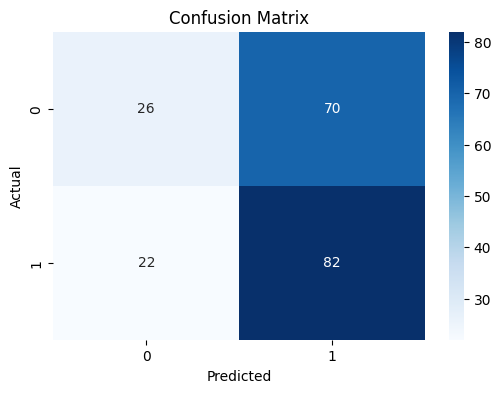

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


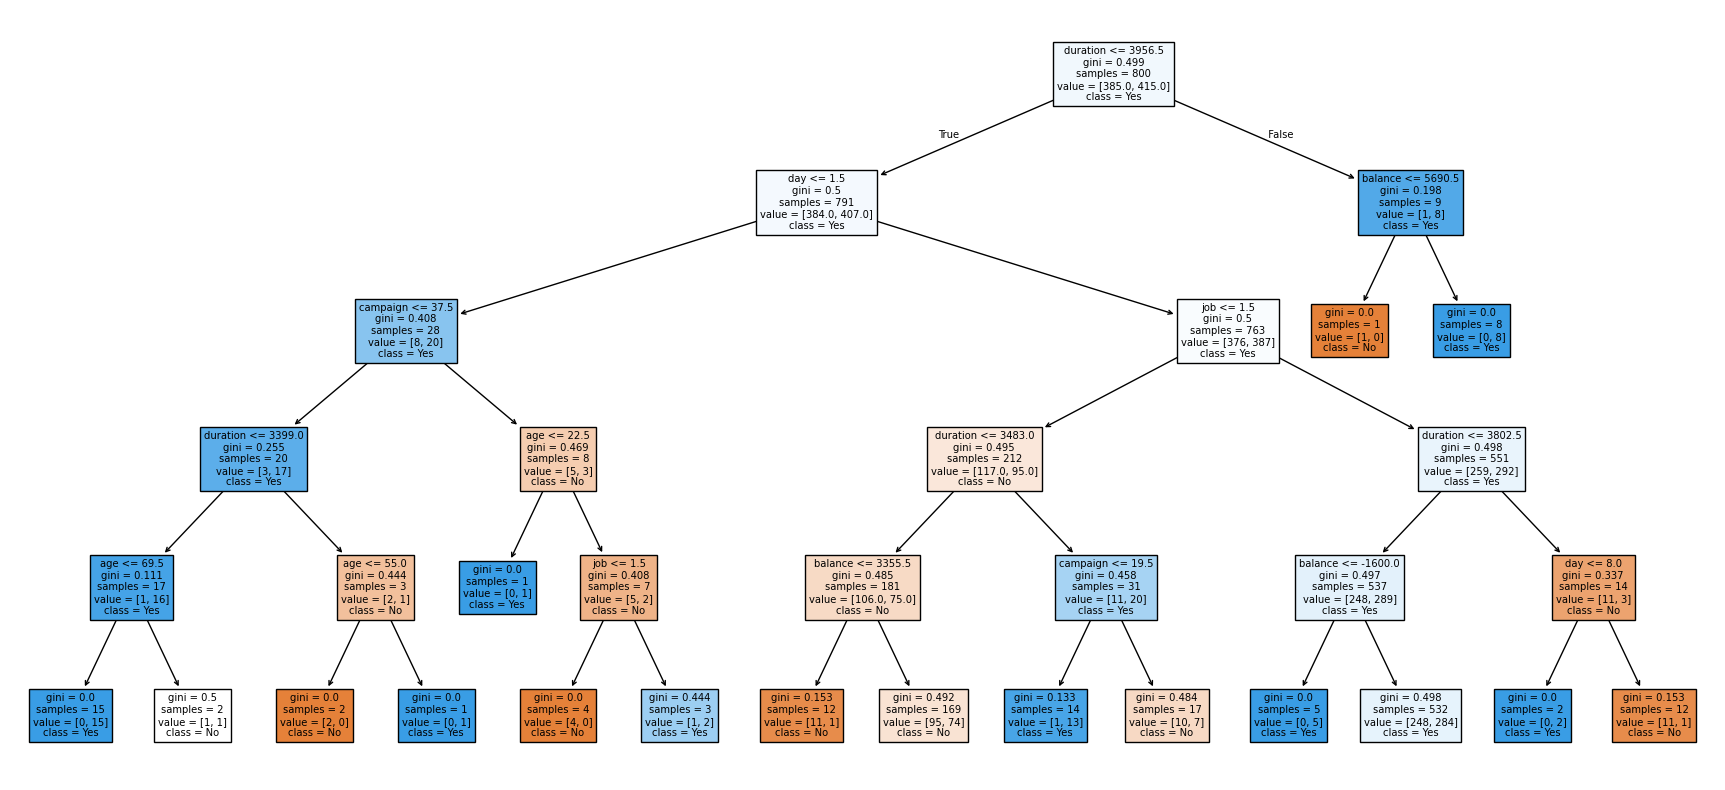

In [11]:
plt.figure(figsize=(22,10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True
)
plt.show()


In [12]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance


,Feature,Importance
11,duration,0.284460
5,balance,0.190776
12,campaign,0.188863
9,day,0.146949
1,job,0.101059
0,age,0.087892
2,marital,0.000000
6,housing,0.000000
4,default,0.000000
3,education,0.000000


In [13]:
import joblib
joblib.dump(dt_model, "decision_tree_bank_model.pkl")


['decision_tree_bank_model.pkl']